In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from geopy.distance import distance

In [3]:
df = pd.read_csv('220-buses.csv', parse_dates=['last_modified'], index_col="last_modified", true_values=['t'], false_values=['f'])

In [4]:
df.shape

(46251, 14)

In [5]:
df.index

DatetimeIndex(['2018-10-25 20:42:28.178000', '2018-10-26 05:40:32.256000',
               '2018-10-26 10:54:28.407000', '2018-10-25 21:24:23.462000',
               '2018-10-28 17:33:06.523000', '2018-10-26 11:23:40.186000',
               '2018-10-26 07:05:26.046000', '2018-10-26 10:13:35.897000',
               '2018-10-25 20:42:32.203000', '2018-10-25 20:43:10.813000',
               ...
               '2018-10-26 22:25:38.216000', '2018-10-26 18:26:37.290000',
               '2018-10-26 20:08:44.282000', '2018-10-25 20:44:01.576000',
               '2018-10-26 18:26:37.290000', '2018-10-26 07:52:34.456000',
               '2018-10-26 20:08:38.198000', '2018-10-26 08:10:30.487000',
               '2018-10-26 06:59:35.052000', '2018-10-27 10:23:14.371000'],
              dtype='datetime64[ns]', name='last_modified', length=46251, freq=None)

In [16]:
df.describe(include="all")

,route_id,direction,vehicle_id,trip_id,congestion_level,accuracy_level,status,is_accessible,latitude,longitude,bearing,pattern_id,has_bike_rack,category
count,4.625100e+04,46251.0,4.625100e+04,4.625100e+04,46251.000000,46251.0,46251.000000,46251,4.625100e+04,4.625100e+04,46251.000000,4.625100e+04,46251,46251.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46251,NaN,NaN,NaN,NaN,46251,NaN
mean,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.425504,3.0,1.298653,NaN,1.867690e+08,-3.062605e+07,176.012951,7.338650e+18,NaN,5.0
std,0.000000e+00,0.0,6.192701e+02,1.496922e+07,0.818516,0.0,0.876525,NaN,8.275939e+04,2.807710e+05,105.394893,1.000278e+03,NaN,0.0
min,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.863929e+08,-3.125003e+07,0.000000,7.338650e+18,NaN,5.0
25%,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.867619e+08,-3.090026e+07,82.000000,7.338650e+18,NaN,5.0
50%,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.867969e+08,-3.054655e+07,146.000000,7.338650e+18,NaN,5.0
75%,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.868145e+08,-3.041914e+07,269.000000,7.338650e+18,NaN,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1072518d0>,
      dtype=object)

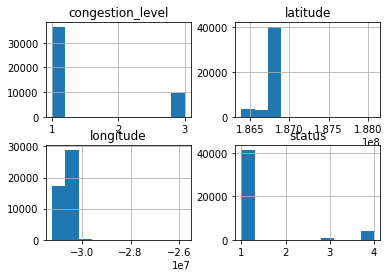

In [44]:
df[['longitude', 'latitude', 'congestion_level', 'status']].hist()

In [6]:
df.head()

,route_id,direction,vehicle_id,trip_id,congestion_level,accuracy_level,status,is_accessible,latitude,longitude,bearing,pattern_id,has_bike_rack,category
last_modified,,,,,,,,,,,,,,
2018-10-25 20:42:28.178,7338652709907595333,1,7338674957838189432,7338656568183670539,1,3,1,False,186672727,-30254414,145,7338650210241173586,False,5
2018-10-26 05:40:32.256,7338652709907595333,1,7338674957838189368,7338656568196335619,1,3,1,False,186796829,-30926765,90,7338650210241173586,False,5
2018-10-26 10:54:28.407,7338652709907595333,1,7338674957838189374,7338656568196229127,1,3,1,False,186716911,-30293701,325,7338650210241173586,False,5
2018-10-25 21:24:23.462,7338652709907595333,1,7338674957838189431,7338656568183674636,1,3,1,False,186529294,-30212292,190,7338650210241173586,False,5
2018-10-28 17:33:06.523,7338652709907595333,1,7338674957838189430,7338656568227064328,1,3,1,False,186830492,-30486938,70,7338650210241173744,False,5


In [33]:
ts = [df[df['trip_id'] == t] for t in df['trip_id'].unique()]
len(ts)

493

In [19]:
church_east = (51.89217, -8.55789) # lat-lon
church_west = (51.89221, -8.55923)

def stop_row(stop, trip):

    def stop_distance(r):
        return distance(stop, (r.latitude / 3600000, r.longitude / 3600000)).m

    ds = {r: stop_distance(r) for r in trip.itertuples()}
    return min(ds, key = lambda r: ds[r])

times = [(stop_row(church_east, t)) for t in ts]

In [31]:
cce_times = pd.DataFrame(times, index=[t.Index for t in times])

In [37]:
cce_times.sort_values(by="Index")[['trip_id', 'vehicle_id']]

,trip_id,vehicle_id
2018-10-19 16:14:26.369,7338656568202248454,7338674957838188920
2018-10-19 16:36:13.042,7338656568183677191,7338674957838189431
2018-10-19 16:40:06.421,7338656568220766469,7338674957838188919
2018-10-19 16:40:06.421,7338656568220766471,7338674957838188919
2018-10-19 16:41:35.966,7338656568183677193,7338674957838189431
2018-10-19 16:42:44.903,7338656568202248456,7338674957838188920
2018-10-19 16:43:32.047,7338656568214376709,7338674957838189370
2018-10-19 16:43:32.047,7338656568214376711,7338674957838189370
2018-10-19 16:43:43.201,7338656568214376713,7338674957838189370
2018-10-19 16:44:56.304,7338656568208445698,7338674957838188755


In [39]:
df.describe(include="all")

,route_id,direction,vehicle_id,trip_id,congestion_level,accuracy_level,status,is_accessible,latitude,longitude,bearing,pattern_id,has_bike_rack,category
count,4.625100e+04,46251.0,4.625100e+04,4.625100e+04,46251.000000,46251.0,46251.000000,46251,4.625100e+04,4.625100e+04,46251.000000,4.625100e+04,46251,46251.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46251,NaN,NaN,NaN,NaN,46251,NaN
mean,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.425504,3.0,1.298653,NaN,1.867690e+08,-3.062605e+07,176.012951,7.338650e+18,NaN,5.0
std,0.000000e+00,0.0,6.192701e+02,1.530015e+07,0.818516,0.0,0.876525,NaN,8.275939e+04,2.807710e+05,105.394893,3.137523e+06,NaN,0.0
min,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.863929e+08,-3.125003e+07,0.000000,7.338650e+18,NaN,5.0
25%,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.867619e+08,-3.090026e+07,82.000000,7.338650e+18,NaN,5.0
50%,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.867969e+08,-3.054655e+07,146.000000,7.338650e+18,NaN,5.0
75%,7.338653e+18,1.0,7.338675e+18,7.338657e+18,1.000000,3.0,1.000000,NaN,1.868145e+08,-3.041914e+07,269.000000,7.338650e+18,NaN,5.0


In [40]:
sum(df['longitude'] > 0)

0